# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 3 -  Aprendizaje Supervisado

# Introducción

Una tarea fundamental en el modelado financiero es la predicción del comportamiento de los precios en un futuro cercano. Usando la serie de precios histórica de los activos como datos de entrenamiento, deseamos predecir si el precio subirá o no, y en qué medida, es decir, nos interesa también el rendimiento.

La predicción de retornos de criptoactivos es un gran desafío para la comunidad de aprendizaje automático debido a la alta volatilidad de los activos, la manipulación del mercado y la naturaleza no estacionaria de los datos, entre otras cuestiones.  

En este práctico aplicaremos algunas técnicas de aprendizaje automático supervisado para predecir el movimiento de activos, a partir de los features que hemos trabajado en el práctico anterior. Exploraremos modelos simples de regresión y clasificación. Para validar los modelos procedemos a evaluar su bondad de ajuste, es decir, que "tan bueno" es el poder predictivo del modelo y comparar su desempeño.

📌 **Conjunto de Entrenamiento y Test**

Para entrenar modelos de ML y seleccionar el más adecuado, debemos particionar los datos en conjuntos de entrenamiento y test (o entrenamiento, validación y test). Si bien la práctica más habitual es seleccionar estos conjuntos al azar, esta metodología no es conveniente cuando trabajamos con series de tiempo, ya que romper la estructura de los datos significa romper la autocorrelación, que es lo que da sentido al análisis. Frente a esto, una posibilidad es realizar la división de datos a partir del procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), otra es implementar lo que se conoce como [timeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).

¡Los invito a indagar sobre estas metodologías!


📌 **Variables Predictoras**

Los predictores son datos que consideramos relevantes para el comportamiento del mercado. En nuestro caso, trabajaremos con los indicadores técnicos calculados en el trabajo práctico anterior y algunos que sumaremos al análisis, pero estos pueden ser muy diversos, como datos de sentimiento, datos de amplitud, datos básicos, gubernamentales, etc., que nos ayudarán a hacer nuestras predicciones. 



📌 **Modelo Baseline**

Establecer un baseline es esencial para cualquier problema de predicción. Este modelo nos brinda un punto de comparación, nos da una idea de cuan bien otros modelos rindieron en el problema en cuestión.

Si la performance de un modelo no alcanza o es similiar a la del baseline, entonces debemos seguir trabajando para mejorar el modelo u optar por algún otro. Nuestro baseline debe ser fácil de implementar y naive. 


Algunas opciones simples para baseline: [link](https://medium.com/analytics-vidhya/benchmarking-methods-for-deep-learning-based-time-series-forecast-ec45f78b61e2).

# 📖 ¡Actividades!

En este práctico evaluaremos el potencial de modelos predictivos simples sobre algunos activos. Esta será la base para construir una canasta de activos con riesgo controlado. 

**Objetivo: predecir el movimiento del precio de cada activo para los próximos n días (tomaremos n=1, n=7)**

## Parte 0 - Feature Engineer

Los invito a explorar y agregar otras características además de las trabajadas anteriormente. Como en el práctico pasado, pueden usar la librería talib o calcularlos ustedes.

- [Indicadores técnicos](https://coinmarketcap.com/alexandria/article/technical-analysis-101-the-best-technical-indicators-for-crypto-and-stocks)
- [Indicadores técnicos en python](https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb)

## Parte I - Clasificación

Por ahora nos concentraremos en predecir si el precio del activo subirá o bajará (es decir, si el retorno a n días será positivo o negativo). Para ello entrenaremos algunos modelos de clasificación.

- DecisionTreeClassifier
- RandomForestClassifier
- XGBClassifier

En este caso, podemos definir nuestro target como 1 o 0:

- Si el rendimiento a n días fue positivo el target tomará el valor 1.
- Si el rendimiento a n días fue negativo o cero el target tomará el valor 0.

Utilicen métricas adecuadas para la evaluación de los modelos (accuracy, recall, precision, etc) 


## Parte II - Regresión

Ahora nuestro objetivo es implementar modelos sobre los activos para predecir su tasa de cambio (ya sea respecto al precio open o close). Consideren los modelos de regresión:

- Desicion tree
- Randon Forest
- XGBoost


Evalúen los resultados, con algunas métricas útiles, tales como Error Cuadrático Medio (RMSE) y el Error Absoluto Medio (MAE). ¿Qué pueden decir?


### ¡Para tener en cuenta!

- Para los modelos de regresión y clasificación elijan un modelo baseline.
- Definir periodos de entrenamiento y test: utilizar librerías adecuadas para series de tiempo.
- Dado el periodo de entrenamiento, chequeen si los datos están balaceados.  
- Analicen la necesidad de estandarizar los datos, según los modelos empleados.
- Ajuste de hiperparámetros de los modelos: dado que los parámetros pueden tomar valores en un amplio rango es recomendable uilizar GridSearchCV. 



## Opcional - Predicción usando Long short-term memory (LSTM)

Las redes de este tipo son adecuadas para clasificar, procesar y hacer predicciones basadas en datos de series temporales, ya que pueden almacenar información pasada. Esto es importante en nuestro caso porque el precio anterior de una acción es crucial para predecir su precio futuro.

Comparen la performance de los modelos anteriores (regresión y/o clasificación) con una red neuronal recurrente (LSTM). 

# Fecha de entrega

- __Versión preliminar: 29/7__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

# Resolución

## Inicialización


### Importar librerías

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import datetime
import time
import os
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import itertools

### Cargar datasets

In [3]:
pairs = ["AAVEUSDT", "ADAUSDT", "AXSUSDT", "BCHUSDT", "BNBUSDT", "BTCUSDT", "COMPUSDT", "DASHUSDT", 
          "DOGEUSDT", "DOTUSDT", "EOSUSDT", "ETCUSDT", "ETHUSDT", "LINKUSDT", "LTCUSDT", "LUNAUSDT", "NEOUSDT", "XMRUSDT", "XRPUSDT"]
interesting_pairs = ["BTCUSDT", "ETHUSDT", "ADAUSDT"]

def add_pair_to_dictionary(dictionary, pair):
  dictionary[pair] = pd.read_csv(f"https://raw.githubusercontent.com/joaquinvvelaco/diplo-datos-2022/main/mentoria/entregables/ayc/output/{pair}_features.csv", index_col=0, parse_dates=True, dayfirst= True)

def get_dataframes():
  dataframes = dict()
  
  for pair in pairs:
    add_pair_to_dictionary(dataframes, pair)
    
  return dataframes

raw_dataframes = get_dataframes() # No agregar columnas en estos dataframes. La idea es mantener los dataframes originales.
dataframes = raw_dataframes.copy() # Cualquier modificación de algún dataframe, realizarlo en estos.
sample_dataframe = dataframes["BTCUSDT"]

In [4]:
print(len(pairs))

19


## Funciones
Definimos un conjunto de funciones comunes para todos los ejercicios.

### Funciones compuestas

In [4]:
def do(func, *args):
  for pair in pairs:
    func(pair, *args)  


def do_interesting(func, *args):
  for pair in interesting_pairs:
    func(pair, *args)

### Funciones para graficar

In [5]:
def plot_multiple_temporal_serie(dataframe, variables, title, xlabel, ylabel, legends=None, together=False):
  if(not together):
    plt.figure(figsize=(20, 6))

  for variable in variables:
    seaborn.lineplot(x=dataframe.index, y=variable, data=dataframe)

  plt.suptitle(f"{title}")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  if(legends != None):
    plt.legend(title='Serie', loc='upper left', labels=legends)

def plot_temporal_serie(dataframe, variable, together=False, title=None, with_trendline=False, add=None):
  if(not together):
    plt.figure(figsize=(20, 6))
  
  if(title==None):
    title = f"Serie temporal"
  
  seaborn.lineplot(x=dataframe.index, y=variable, data=dataframe).set(
      xlabel="Fecha", 
      ylabel=variable,
      title=title
  )
  if(with_trendline):
    seaborn.regplot(x=dataframe.index.map(pd.Timestamp.toordinal), y=variable, data=dataframe, ci=None)
  
  if(add!=None):
    seaborn.lineplot(x=dataframe.index, y=add, data=dataframe)

## Parte 0

### Nuevas features

In [ ]:
def add_bollinger_bands(pair):
    dataframe = dataframes[pair]
    dataframe['15MA'] = dataframe.groupby('symbol')['close'].transform(lambda x: x.rolling(window=15).mean())
    dataframe['SD'] = dataframe.groupby('symbol')['close'].transform(lambda x: x.rolling(window=15).std())
    dataframe['upperband'] = dataframe['15MA'] + 2*dataframe['SD']
    dataframe['lowerband'] = dataframe['15MA'] - 2*dataframe['SD']

#do(add_stochastic_oscillator)

## Parte 1

### Preprocesamiento

In [6]:
sample_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 2019-01-01 00:00:00 to 2022-05-05 12:00:00
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   open                  7307 non-null   float64
 1   high                  7307 non-null   float64
 2   low                   7307 non-null   float64
 3   close                 7307 non-null   float64
 4   volume                7307 non-null   float64
 5   exchange_rate_open    7306 non-null   float64
 6   exchange_rate_high    7306 non-null   float64
 7   exchange_rate_low     7306 non-null   float64
 8   exchange_rate_close   7306 non-null   float64
 9   exchange_rate_volume  7306 non-null   float64
 10  moving_average_close  7140 non-null   float64
 11  rsi                   7293 non-null   float64
 12  adx                   7280 non-null   float64
 13  macd                  7274 non-null   float64
 14  macd_signal           7274 non-null 

Al momento de generar las features, se agregaron valores NaN a cada dataframe. Esto se debe a que el cálculo de la mayoría de las features son móviles, por lo que no es posible calcularlos para los primeros valores de las series. A partir de esto, y considerando que en el análisis exploratorio identifiamos que no existía un comportamiento estacional en las series, decidimos "dropear" los primeros valores de las series. 

In [7]:
def drop_na(pair):
    dataframes[pair] = dataframes[pair].dropna()

do(drop_na)

In [8]:
dataframes["AAVEUSDT"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3234 entries, 2020-11-11 20:00:00 to 2022-05-05 12:00:00
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   open                  3234 non-null   float64
 1   high                  3234 non-null   float64
 2   low                   3234 non-null   float64
 3   close                 3234 non-null   float64
 4   volume                3234 non-null   float64
 5   exchange_rate_open    3234 non-null   float64
 6   exchange_rate_high    3234 non-null   float64
 7   exchange_rate_low     3234 non-null   float64
 8   exchange_rate_close   3234 non-null   float64
 9   exchange_rate_volume  3234 non-null   float64
 10  moving_average_close  3234 non-null   float64
 11  rsi                   3234 non-null   float64
 12  adx                   3234 non-null   float64
 13  macd                  3234 non-null   float64
 14  macd_signal           3234 non-null 

In [9]:
dataframe = dataframes["BTCUSDT"]

dataframe_offset = dataframe.shift(-1)

print(dataframe.close.tail())
print("\n")
print(dataframe_offset.close.tail().fillna(method="ffill"))


(dataframe.close.tail()<dataframe_offset.close.tail().fillna(method="ffill")).astype(int)

date
2022-05-04 20:00:00    39773.33
2022-05-05 00:00:00    39549.28
2022-05-05 04:00:00    39513.66
2022-05-05 08:00:00    38209.00
2022-05-05 12:00:00    38209.00
Name: close, dtype: float64


date
2022-05-04 20:00:00    39549.28
2022-05-05 00:00:00    39513.66
2022-05-05 04:00:00    38209.00
2022-05-05 08:00:00    38209.00
2022-05-05 12:00:00    38209.00
Name: close, dtype: float64


date
2022-05-04 20:00:00    0
2022-05-05 00:00:00    0
2022-05-05 04:00:00    0
2022-05-05 08:00:00    0
2022-05-05 12:00:00    0
Name: close, dtype: int32

Agregamos la columna target `{column}_will_be_greater_{period}`

In [10]:
dataframes_y = dict()

def build_target_dataframe(pair, column, period):
    dataframe = dataframes[pair]
    dataframe_column_offset = dataframe[column].shift(-period).fillna(method="ffill")
    dataframe_y = pd.DataFrame()
    dataframe_y[f"{column}_will_be_greater_{period}"] = (dataframe[column] < dataframe_column_offset).astype(int)
    dataframes_y[pair] = dataframe_y

    
    
do(build_target_dataframe, "close", 6*10) # 6 observaciones es 1 día, por lo que el periodo será 10 días


In [11]:
dataframes_y["BTCUSDT"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7140 entries, 2019-01-28 20:00:00 to 2022-05-05 12:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   close_will_be_greater_60  7140 non-null   int32
dtypes: int32(1)
memory usage: 83.7 KB


Estandarizamos los dataframes

In [12]:
def standardize(pair):
    dataframe = dataframes[pair]
    columns = dataframe.columns
    dataframe[columns] = StandardScaler().fit_transform(dataframe)

do(standardize)


C:\Users\Joaquin\AppData\Local\Temp\ipykernel_20236\635600892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columns] = StandardScaler().fit_transform(dataframe)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_20236\635600892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columns] = StandardScaler().fit_transform(dataframe)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_20236\635600892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [19]:
dataframes["AAVEUSDT"].tail()

,open,high,low,close,volume,exchange_rate_open,exchange_rate_high,exchange_rate_low,exchange_rate_close,exchange_rate_volume,moving_average_close,rsi,adx,macd,macd_signal,macd_hist
date,,,,,,,,,,,,,,,,
2022-05-04 20:00:00,-0.929293,-0.906154,-0.902362,-0.887746,-0.408704,0.317697,0.931549,0.397357,1.014975,-0.625505,-0.819672,1.173452,0.177938,0.025008,-0.253460,0.829564
2022-05-05 00:00:00,-0.887163,-0.908615,-0.893673,-0.909661,-0.598411,1.033955,-0.093051,0.163511,-0.560338,-0.527846,-0.821936,0.849984,0.206971,0.093347,-0.182963,0.837084
2022-05-05 04:00:00,-0.910756,-0.921739,-0.899755,-0.910504,-0.614074,-0.598894,-0.389305,-0.158476,-0.046097,-0.238516,-0.824102,0.837434,0.210903,0.144766,-0.115574,0.800268
2022-05-05 08:00:00,-0.910756,-0.914357,-0.976218,-0.995636,0.789766,-0.024514,0.182218,-1.694321,-2.139442,3.285405,-0.826594,-0.231628,0.029537,0.101190,-0.070978,0.530342
2022-05-05 12:00:00,-0.995015,-0.914357,-0.976218,-0.995636,0.789766,-2.112087,-0.024840,-0.026391,-0.025177,-0.200884,-0.829480,-0.231628,-0.138875,0.065648,-0.042898,0.334740


Separamos en train y test

In [13]:
dataframes_X_train = dict()
dataframes_y_train = dict()
dataframes_X_test = dict()
dataframes_y_test = dict()


def split_train_test(pair):
    tss = TimeSeriesSplit(n_splits = 3)
    for train_index, test_index in tss.split(dataframes[pair]):
        dataframes_X_train[pair], dataframes_X_test[pair] = dataframes[pair].iloc[train_index, :], dataframes[pair].iloc[test_index,:]
        dataframes_y_train[pair], dataframes_y_test[pair] = dataframes_y[pair].iloc[train_index], dataframes_y[pair].iloc[test_index]

do(split_train_test)

### Clasificaciones

Definimos las entidades ModelEvaluation y Model para encpasular la lógica relacionada a entrenamiento, ajuste de hiperparámetros, predicciones y evaluación de modelos

In [14]:
class ModelEvaluation:
    def __init__(self, X_train, y_train, X_test, y_test, model, pair):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = model
        self.pair = pair

    def evaluate(self):
        print("\n")
        print(f"Evaluación del modelo {self.model.name} en el par {self.pair}")
        print("="*50)
        best_hyperparameters = self.model.get_best_hyperparameters(self.X_train, self.y_train)
        self.model.evaluate(
            best_hyperparameters,
            self.X_train,
            self.y_train,
            self.X_test,
            self.y_test,
        )
        print("="*50)
        print("\n")

class Model:
    def __init__(self, name, model, hyperparameters_grid):
        self.name = name
        self.model = model
        self.hyperparameters_grid = hyperparameters_grid

    def evaluate(self, best_params, X_train, y_train, X_test, y_test):
        pred_classes = [1, 0]

        self.model.set_params(**best_params)

        self.model.fit(X_train, y_train)

        y_pred_test = self.model.predict(X_test)
        y_pred_train = self.model.predict(X_train)

        self.report_metrics(y_train, y_pred_train, pred_classes,
                        description="Conjunto de entrenamiento")

        self.report_metrics(y_test, y_pred_test, pred_classes, 
                        description="Conjunto de evaluación")

    def get_best_hyperparameters(self, X_train, y_train, scoring='accuracy', cv=5, print_values=False, print_results=False, print_best=False):
        grid_cv = GridSearchCV(
            estimator= self.model,
            param_grid= self.hyperparameters_grid,
            cv=cv,
            scoring=scoring,
            n_jobs=5, 
            refit=True, 
            return_train_score=True, 
            verbose=1
        )

        # Fit to the training data
        grid_cv.fit(X_train, y_train)

        best_params = grid_cv.best_params_

        if print_values:
        # Print the values used for hyperparameters
            print(f"""
            The values used for the hyperparameters:
            {grid_cv.cv_results_}
            """)

        if print_best:
        # Print best score and params
            print("\nMejor configuración:")
            display(pd.DataFrame([best_params]))
            print("\nAccuracy promedio (mejor configuración) %.3f" % grid_cv.best_score_)

        if print_results:
            results = self.format_results(grid_cv.cv_results_, self.hyperparameters_grid)
            print("\nAccuracy promedio y varianza para todas las configuraciones "
            "(ordernadas en forma descendiente):")
            display(results)

        return best_params

    def format_results(self, results, params):
        results_df = pd.DataFrame(results)
        cols = ['param_' + param for param in params.keys()] 
        cols += ['mean_test_score', 'std_test_score']
        results_df = results_df[cols].sort_values(by='mean_test_score', 
                                                    ascending=False)
        results_df['variance'] = results_df['std_test_score']**2
        return results_df

    def report_metrics(self, y_true, y_predicted, cm_labels, description=None):
        if description:
            print(description)

        print("\tAccuracy (exactitud):  %.2f" % accuracy_score(y_true, y_predicted))
        print("\tPrecision (precisión):  %.2f" % precision_score(y_true, y_predicted))
        print("\tRecall (cobertura/exhaustividad):  %.2f" % 
                recall_score(y_true, y_predicted))
        print("\tF1:  %.2f" % f1_score(y_true, y_predicted))

        cm = confusion_matrix(y_true, y_predicted)
        
        self.plot_confusion_matrix(cm, cm_labels, 
                                title=f"Confusion matrix ({description})")          

    def plot_confusion_matrix(self, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.figure().clear()
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('Etiqueta correcta')
        plt.xlabel('Etiqueta predicha')          

Creamos un array con las instancias de cada modelo

In [15]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
hiperparams_decision_tree_classifier = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(4, 25, 4),
    'max_features': ['auto', 'log2', 'sqrt']
}

random_forest_classifier = RandomForestClassifier(random_state=0)
hiperparams_random_forest_classifier = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 25, 4),
    'n_estimators': np.arange(10, 100, 10),
    'max_features': ['log2', 'sqrt']
}

xg_boost = xgb.XGBClassifier(random_state=0)
hiperparams_xg_boost = {
    "learning_rate": np.linspace(0.1, 0.2, 3), 
    'max_depth': np.arange(4, 25, 4),
    'n_estimators': np.arange(10, 100, 10),
}


models = [
    Model("DecisionTreeClassifier", decision_tree_classifier, hiperparams_decision_tree_classifier),
    Model("RandomForestClassifier", random_forest_classifier, hiperparams_random_forest_classifier),
    Model("XGBClassifier", xg_boost, hiperparams_xg_boost)
]

In [16]:
evaluation_models = []

def add_evaluation_model(pair, models, evaluation_models, ):
    X_train = dataframes_X_train[pair]
    y_train = dataframes_y_train[pair]
    X_test = dataframes_X_test[pair]
    y_test = dataframes_y_test[pair]

    for model in models:
        evaluation_models.append(ModelEvaluation(X_train, y_train, X_test, y_test, model, pair))

do(add_evaluation_model, models, evaluation_models)







Evaluación del modelo RandomForestClassifier en el par ADAUSDT
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\Joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_20236\323788234.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_train, y_train)


Conjunto de entrenamiento
	Accuracy (exactitud):  0.70
	Precision (precisión):  0.67
	Recall (cobertura/exhaustividad):  0.95
	F1:  0.79
Conjunto de evaluación
	Accuracy (exactitud):  0.57
	Precision (precisión):  0.47
	Recall (cobertura/exhaustividad):  0.64
	F1:  0.54




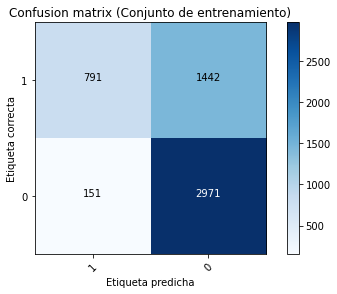

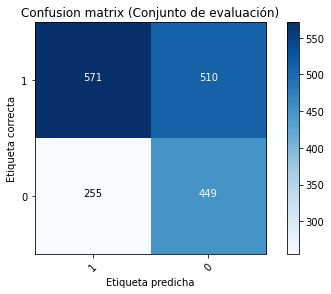

In [18]:
evaluation_models[4].evaluate()

## Parte 2